## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Loading the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [9]:
X = dataset.drop(columns=['Purchased','Gender','User ID'],axis=1)

In [10]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [11]:
y = dataset['Purchased']

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Print count of each label in Purchased column

In [13]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [14]:
print(dataset.corr())

                  User ID       Age  EstimatedSalary  Purchased
User ID          1.000000 -0.000721         0.071097   0.007120
Age             -0.000721  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.155238         1.000000   0.362083
Purchased        0.007120  0.622454         0.362083   1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

## Train the model with random_state = 0

In [17]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Print the prediction results

In [18]:
y_predict = lr.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Create dataframe with the Actual Purchased and Predict Purchased

In [23]:
test_dataset = X_test.copy()
test_dataset['Actual_Purchased'] = y_test
test_dataset['Predict_Purchased'] = y_predict
test_dataset

,Age,EstimatedSalary,Actual_Purchased,Predict_Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


In [24]:
(test_dataset['Actual_Purchased'] == test_dataset['Predict_Purchased']).value_counts()

True     68
False    32
dtype: int64

## Print Confusion Matrix and classification_report

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,ConfusionMatrixDisplay

In [30]:
print(confusion_matrix(y_test,y_predict))

[[68  0]
 [32  0]]


In [28]:
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100

[[68  0]
 [32  0]]
0.68


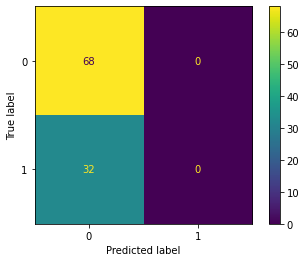

In [34]:
cm = confusion_matrix(y_test,y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lr.classes_)
disp.plot()

plt.show()

## Use StandardScaler() to improved performance and re-train your model

In [35]:
ss = StandardScaler()

In [71]:
X_Scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_Scaled)
X_scaled.head()

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.25, random_state = 0)

In [42]:
lr_Scaled = LogisticRegression(random_state=0)

In [43]:
lr_Scaled.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred = lr_Scaled.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [73]:
test = ss.transform([[30,90_000]])
lr_Scaled.predict(test)

array([0], dtype=int64)

## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [74]:
test2 = ss.transform([[40,90_000]])
lr_Scaled.predict(test2)

array([1], dtype=int64)

In [75]:
test3 = ss.transform([[43,102_000]])
lr_Scaled.predict(test3)

array([1], dtype=int64)

In [76]:
test = ss.transform([[29,91_000]])
lr_Scaled.predict(test)

array([0], dtype=int64)